#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# Reading data file
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df=pd.read_csv('train.csv')

#### Data Understanding and Cleaning

In [3]:
# Reading first 5 rows of the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Checking shape of the dataframe
df.shape

(1460, 81)

In [5]:
# Checking for datatype and null values of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Information about the columns
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#Columns with non zero null values and percentage of null values in each
print(round((df.isnull().sum()/len(df.index))*100,2).sort_values(ascending=False)[round((df.isnull().sum()/len(df.index))*100,2)>0.0])


PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64


In [8]:
#Removing variables with >80% missing values
df=df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [9]:
# Shape of the dataframe
df.shape

(1460, 77)

In [10]:
#### Checking correlations for the numeric columns

<AxesSubplot:>

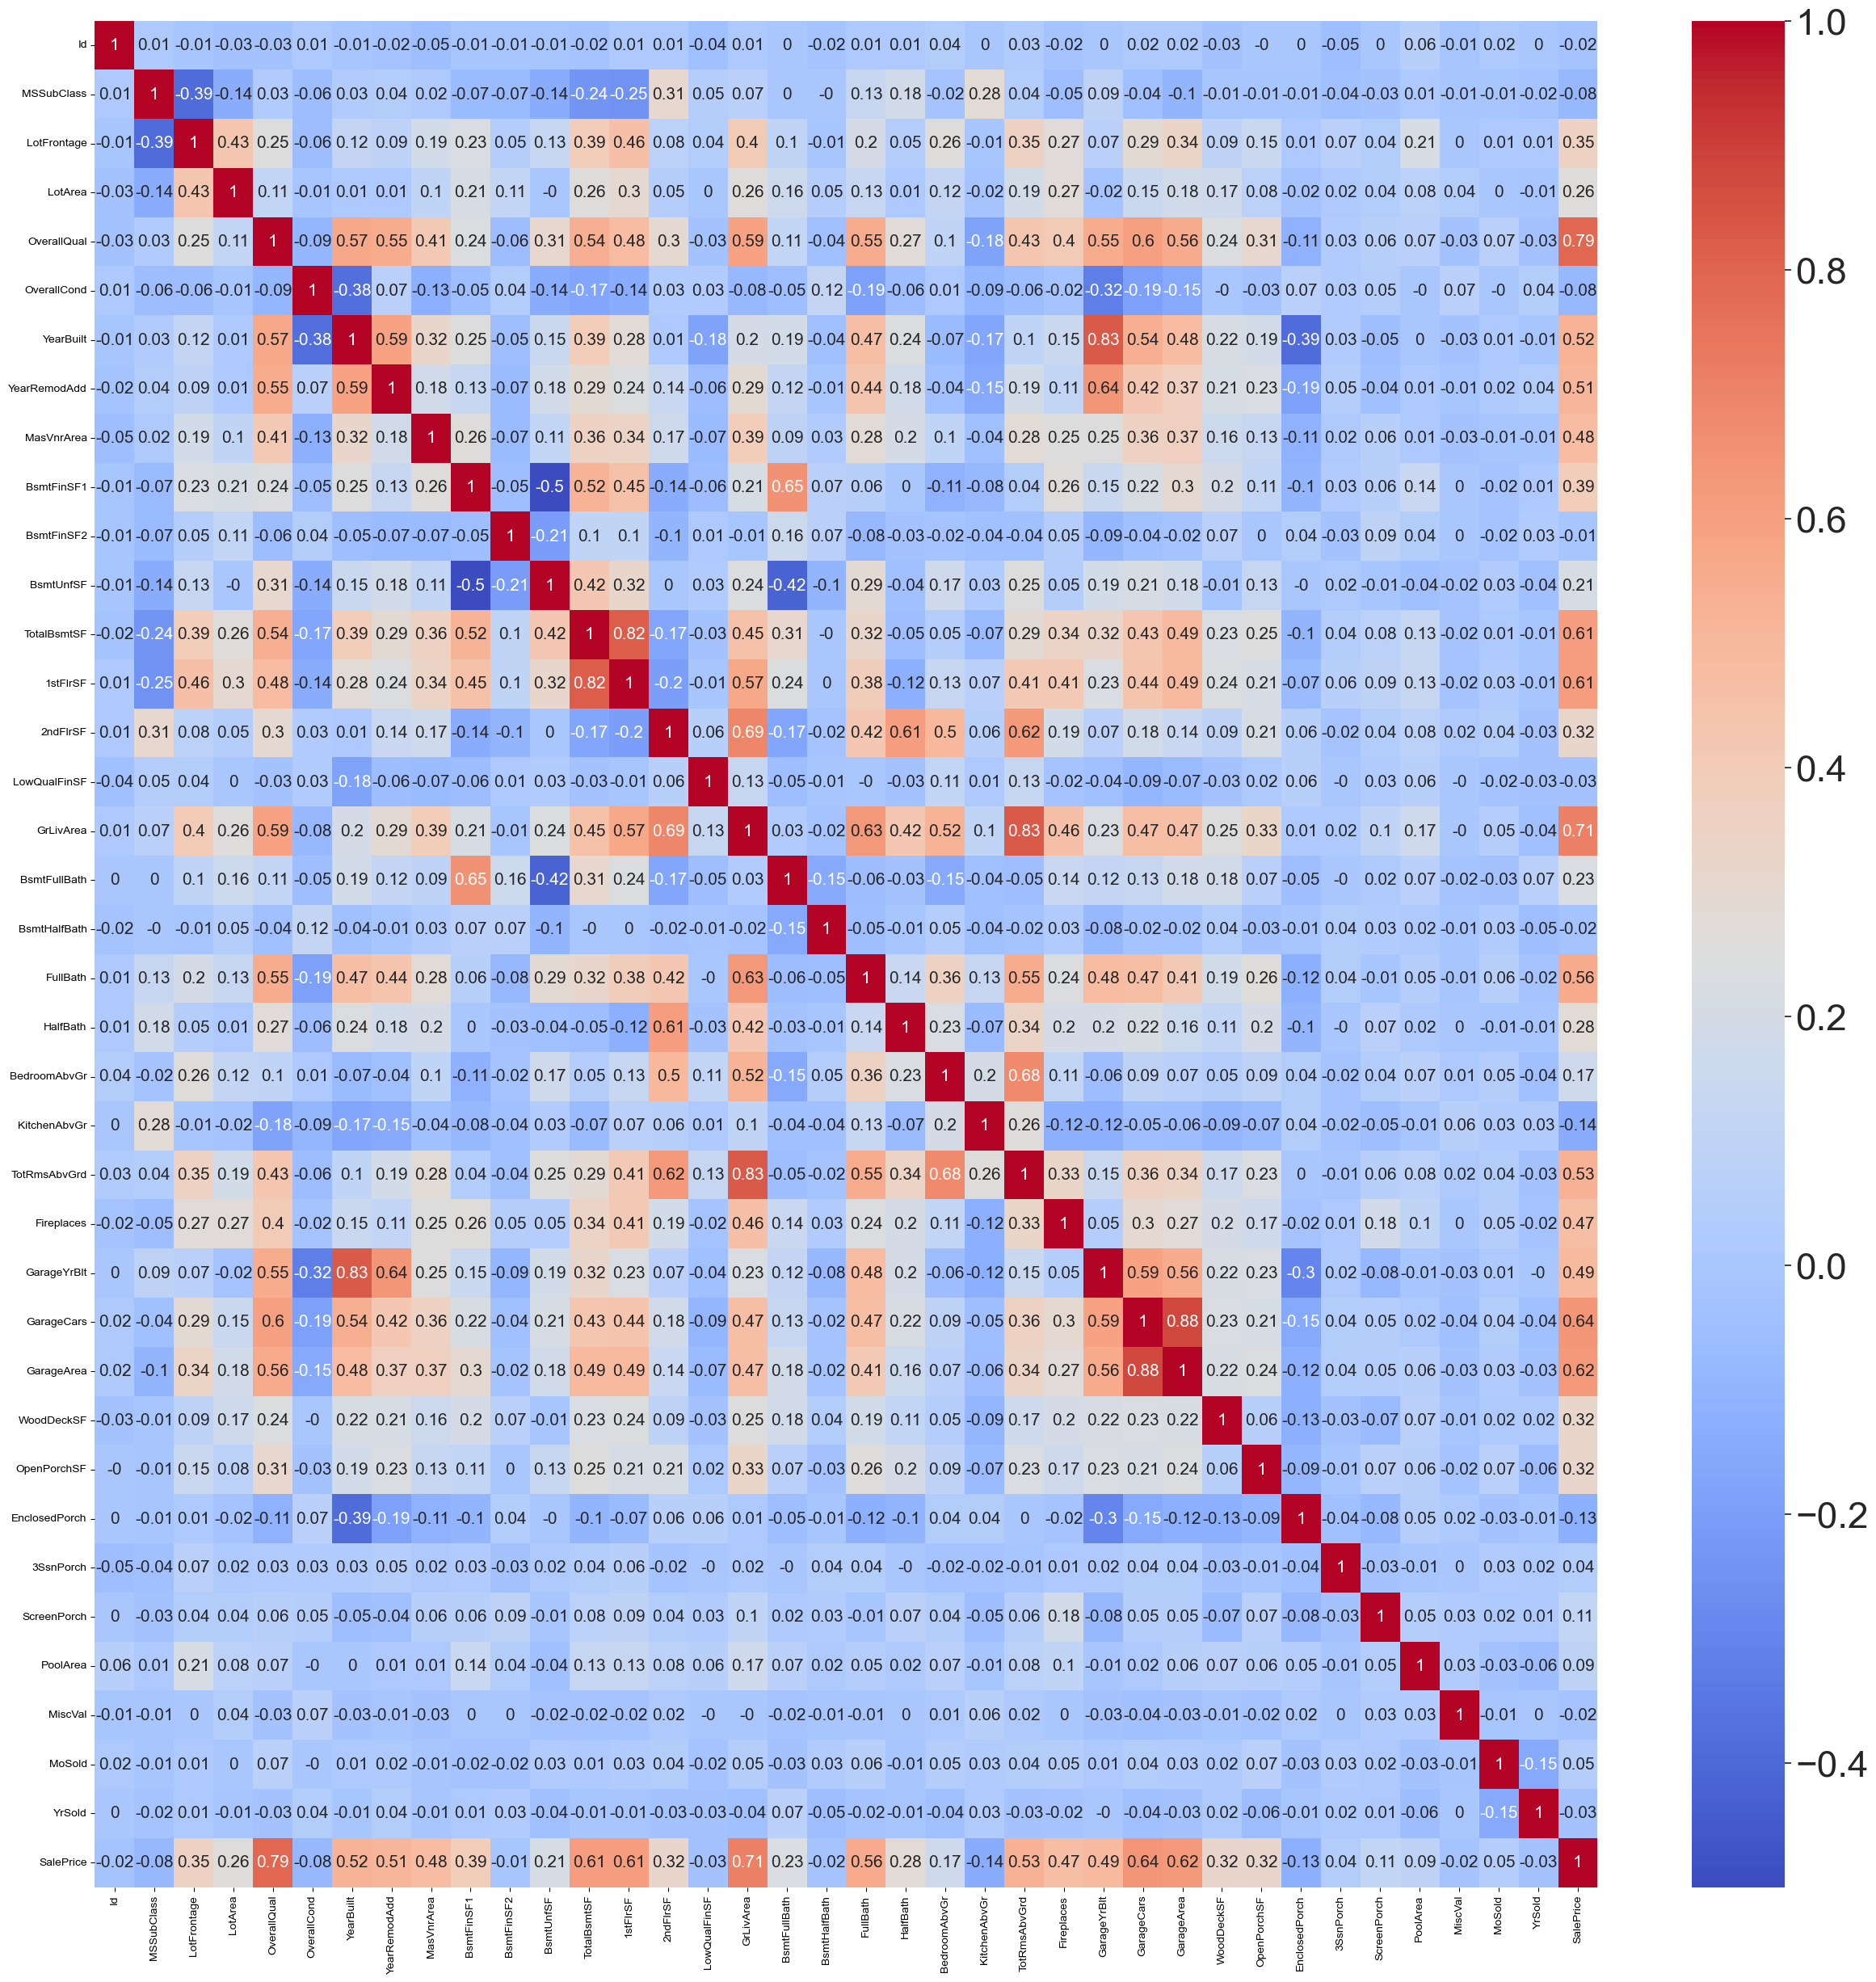

In [11]:
plt.subplots(figsize=(30,30))
sns.set(font_scale=3)
sns.heatmap(round(df.corr(),2),annot=True,annot_kws={"size":15},cmap='coolwarm')

 - Garage area and garage cars are highly correlated so removing garage area
 - GrLivArea and Totrmsabvgr are highly correlated so removing GrLivArea
 - 1stFlrSF and TotalBsmtSF are highly correlated so removinf 1stFlrSF

 - OverallQual,TotalBsmtSF,GrLivArea,FullBath, TotRmsAbvGrd,GarageCars,GarageArea are linearly related with the Sale Price.

In [12]:

df.drop(['GarageArea','TotRmsAbvGrd','1stFlrSF'],axis=1,inplace=True)
df.shape

(1460, 74)

In [13]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,2003.0,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


- Dropping Id column as we do not need this for model building

In [14]:
df.drop('Id',axis=1,inplace=True)

In [15]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,2003.0,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


#### Data visualization

In [16]:
# Taking columns which are highly correlated with Sale Price
corr_matrix=df.corr()
corr_series=corr_matrix.loc['SalePrice']
high_corr=corr_series[(corr_series>0.5) | (corr_series<-0.5)]
high_corr

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
GrLivArea       0.708624
FullBath        0.560664
GarageCars      0.640409
SalePrice       1.000000
Name: SalePrice, dtype: float64

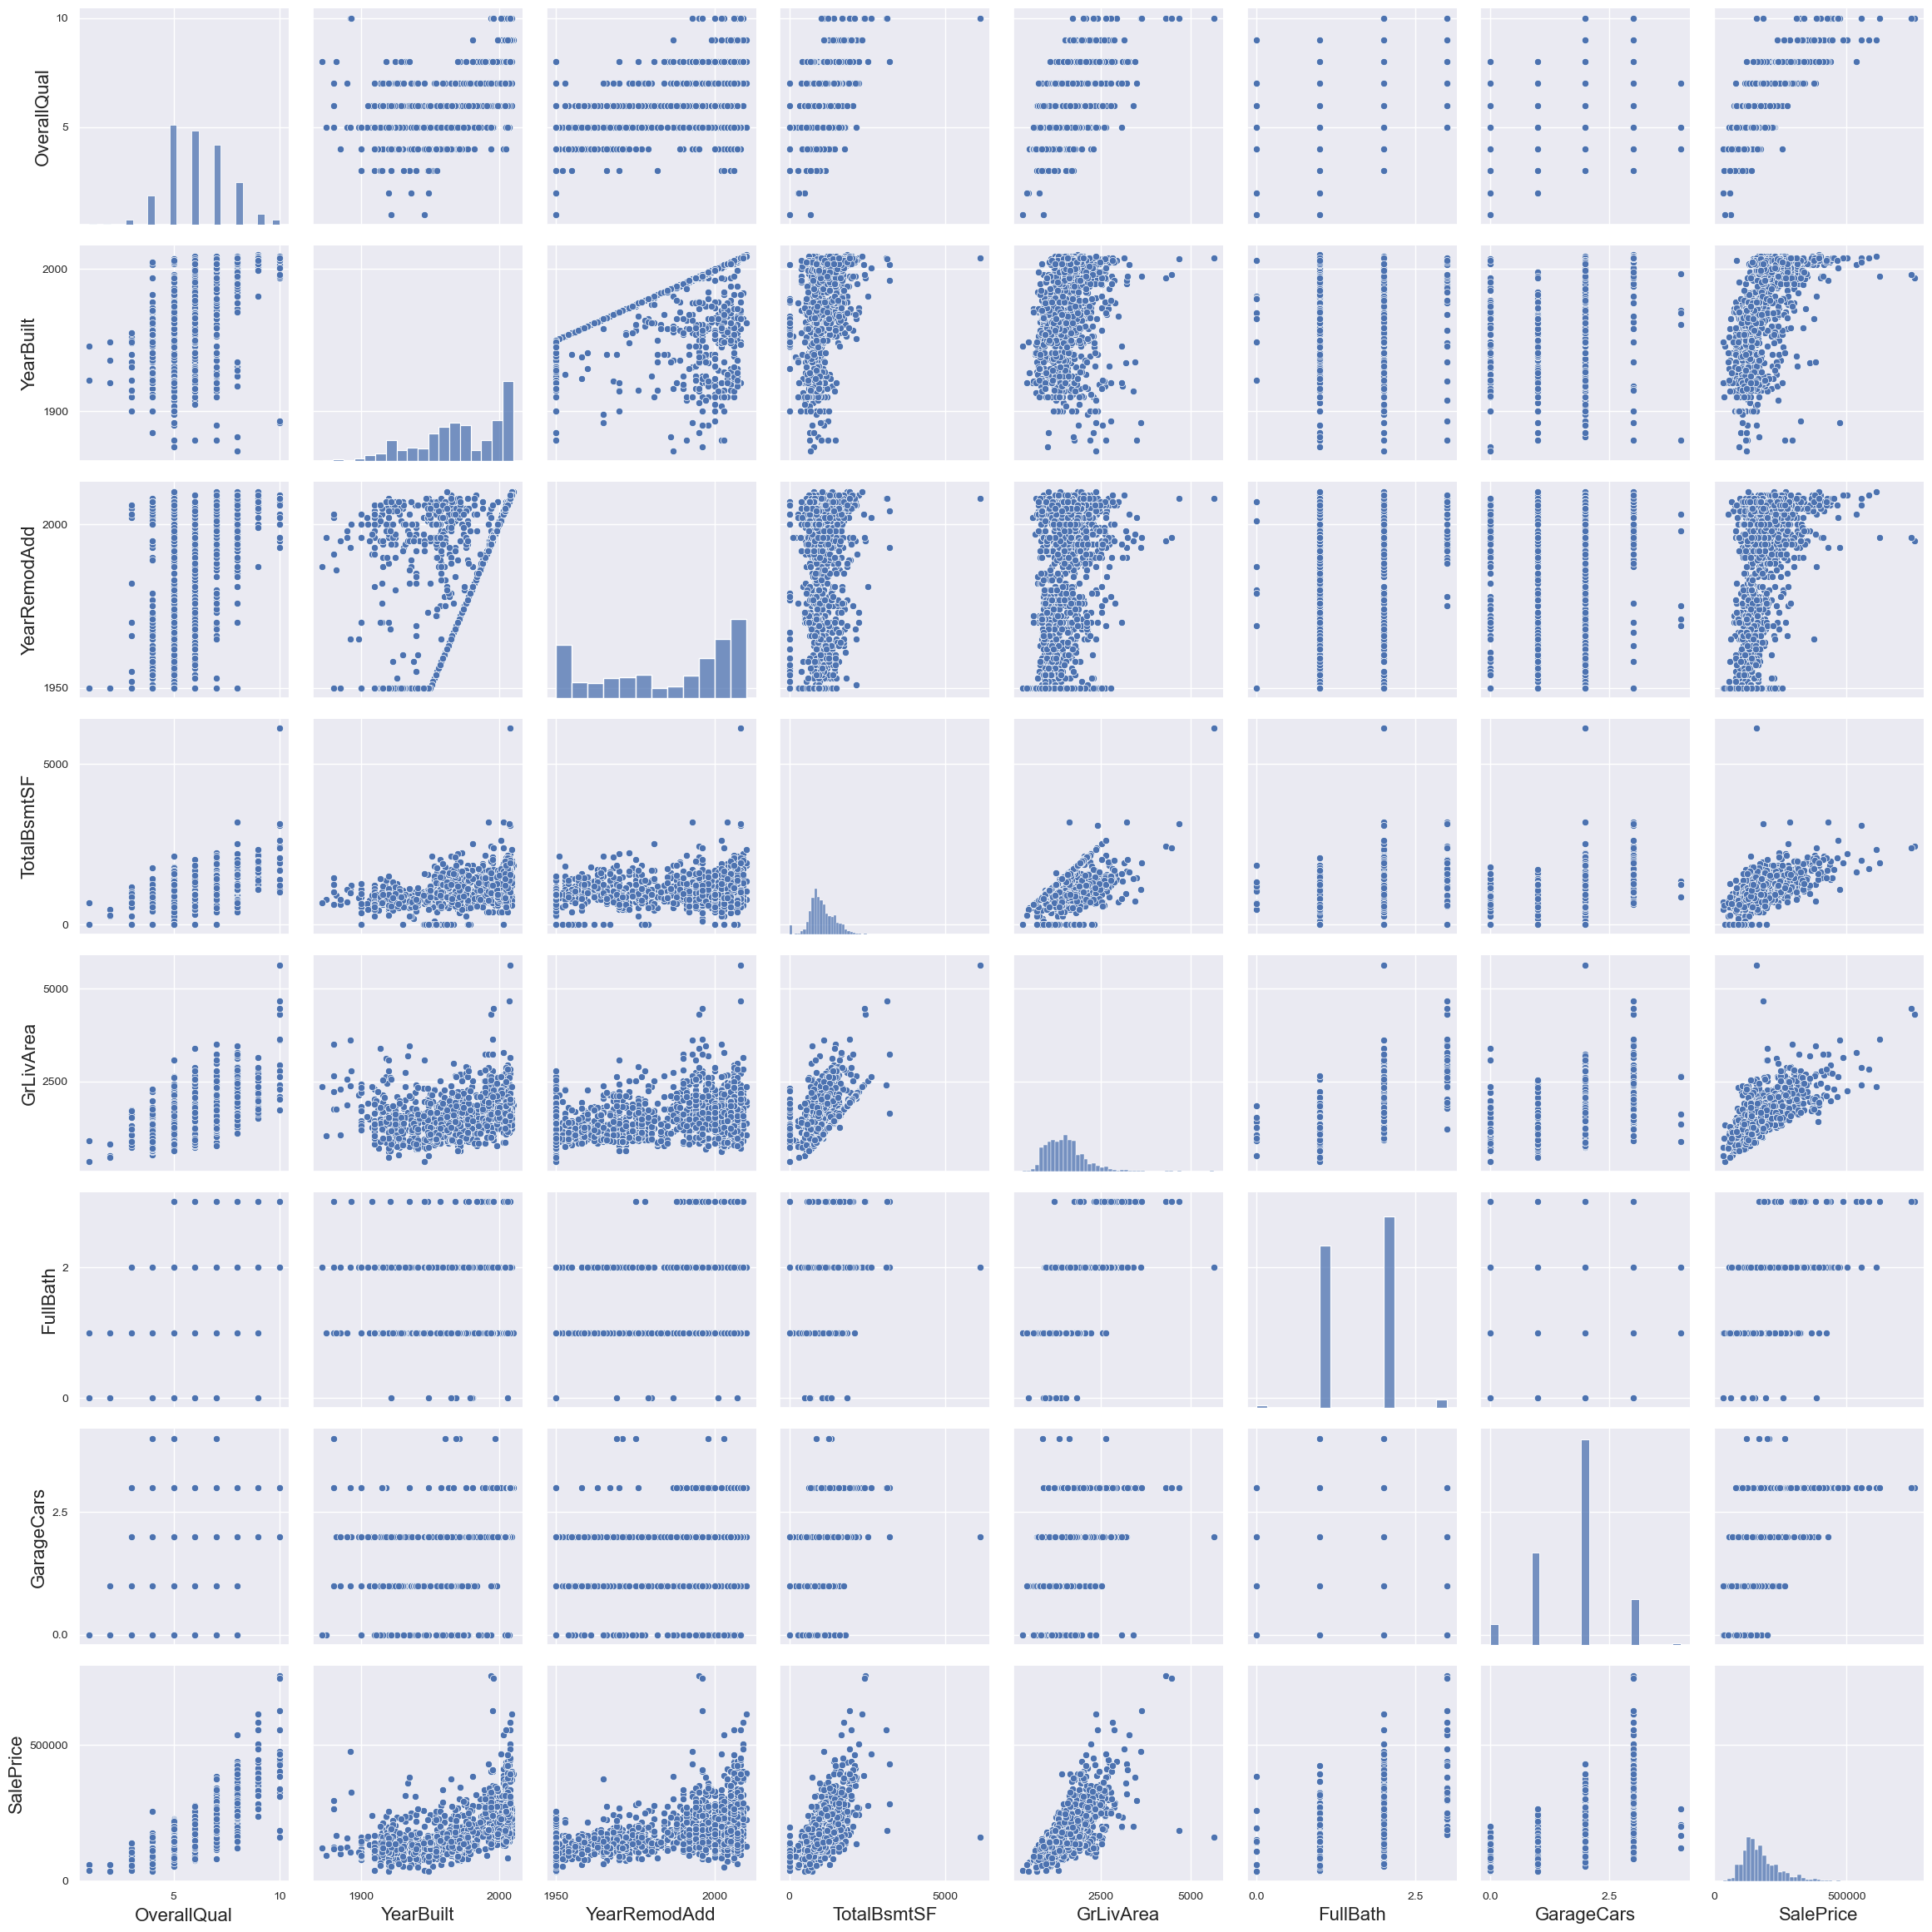

In [17]:
#Plotting columns which are linaerly correlated with the sales price column
with sns.plotting_context(rc={"axes.labelsize":16,'xtick.labelsize': 10,'ytick.labelsize': 10}):
    sns.pairplot(df[list(high_corr.index)],height=3)

 - We can see that the columns have high linear correlation with the Sale Price column

#### Derived coluumns

In [18]:
df['PropertyAge'] = (df['YrSold'] - df['YearBuilt'])
df['GarageAge']=(df['YrSold']-df['GarageYrBlt'])
df['RemodAge']=df['YearRemodAdd']-df['YearBuilt']

In [19]:
# Dropping redundant columns

In [20]:
df.drop(['MoSold','YearBuilt','YrSold','GarageYrBlt','YearRemodAdd'],axis=1,inplace=True)

#### Segregating numeric and categorical columns.

In [21]:
numeric_col=[]
categorical_col=[]
for col in df.columns:
    if df[col].dtypes=='int64' or df[col].dtypes=='float64':
        numeric_col.append(col)
    else:
        categorical_col.append(col)
        

In [22]:
print("number of numeric columns ",len(numeric_col),"\n","number of categorical columns ",len(categorical_col))

number of numeric columns  32 
 number of categorical columns  39


#### Removing outliers

In [23]:
#Checking for columns which have outliers
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,GarageAge,RemodAge
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,0.613014,1.767123,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,36.547945,29.306019,13.597945
std,42.300571,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,438.705324,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.644666,0.747315,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.250152,24.726881,24.476465
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.000000,6.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,2.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000,28.000000,0.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.000000,47.000000,20.000000
90%,120.000000,96.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,1.000000,3.000000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000,84.000000,62.400000,51.000000
95%,160.000000,107.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,3.000000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000,91.000000,79.000000,73.000000
99%,190.000000,141.000000,37567.640000,10.000000,9.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,2.000000,3.000000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000,110.410000,90.220000,96.000000


 - Visualizing columns with large number of outliers

In [24]:
outlier_cols=['LotArea','MasVnrArea','ScreenPorch','3SsnPorch']

C:\Users\bhuta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

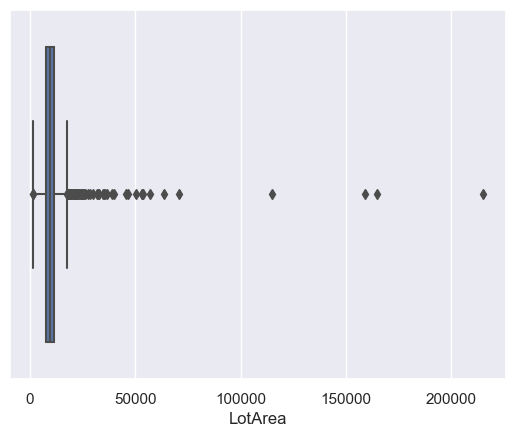

In [25]:
sns.set(font_scale=1)
sns.boxplot(df['LotArea'])

C:\Users\bhuta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MasVnrArea'>

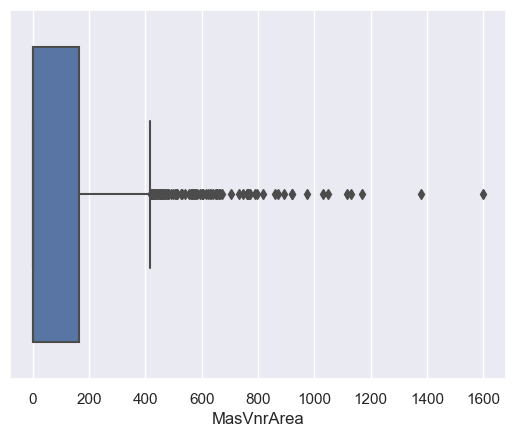

In [26]:
sns.boxplot(df['MasVnrArea'])


C:\Users\bhuta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ScreenPorch'>

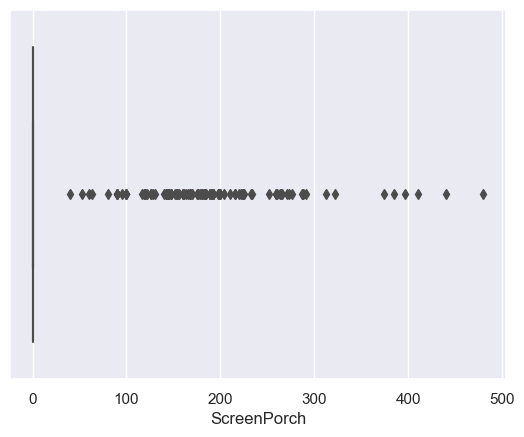

In [27]:
sns.boxplot(df['ScreenPorch'])


C:\Users\bhuta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='3SsnPorch'>

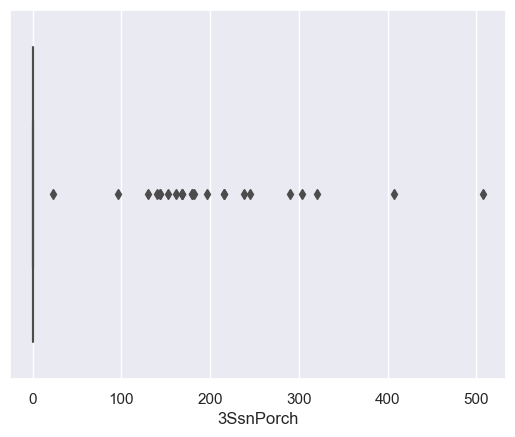

In [28]:
sns.boxplot(df['3SsnPorch'])

#### Removing outliers

In [29]:
#Q1 = house['ScreenPorch'].quantile(0.1)
for col in outlier_cols:
    q1 = df[col].quantile(0.1)
    q3=df[col].quantile(0.9)
    IQR = q3-q1
    df=df[(df[col] >=q1 - 1.5*IQR) & 
                      (df[col] <= q3 + 1.5*IQR)]

In [30]:
df.shape

(1281, 71)

#### Percentage of unique values in categorical columns

In [31]:
for col in categorical_col:
    print(col,"\n",(df[col].value_counts()/len(df.index))*100)
    print('\n')

MSZoning 
 RL         77.361436
RM         16.081187
FV          4.605777
RH          1.249024
C (all)     0.702576
Name: MSZoning, dtype: float64


Street 
 Pave    99.687744
Grvl     0.312256
Name: Street, dtype: float64


LotShape 
 Reg    65.183450
IR1    32.162373
IR2     2.107728
IR3     0.546448
Name: LotShape, dtype: float64


LandContour 
 Lvl    91.100703
Bnk     4.137393
HLS     3.278689
Low     1.483216
Name: LandContour, dtype: float64


Utilities 
 AllPub    100.0
Name: Utilities, dtype: float64


LotConfig 
 Inside     72.521468
Corner     18.110851
CulDSac     5.698673
FR2         3.356753
FR3         0.312256
Name: LotConfig, dtype: float64


LandSlope 
 Gtl    95.862607
Mod     3.825137
Sev     0.312256
Name: LandSlope, dtype: float64


Neighborhood 
 NAmes      14.988290
CollgCr    11.241218
OldTown     8.352849
Edwards     6.869633
Somerst     6.167057
Gilbert     5.620609
Sawyer      5.386417
NridgHt     5.074161
NWAmes      4.761905
SawyerW     4.059329
BrkSide   

In [32]:
#Dropping street, utilities, condition2 as they have very less variance
df=df.drop(['Street','Utilities','Condition2'],axis=1)

In [33]:
df.shape

(1281, 68)

#### Imputing missing values

In [34]:
#### Columns with number of null values 

In [35]:
for col in df.columns:
    if df[col].isnull().sum()!=0:
        print(col,"\t",df[col].isnull().sum())


LotFrontage 	 221
BsmtQual 	 36
BsmtCond 	 36
BsmtExposure 	 37
BsmtFinType1 	 36
BsmtFinType2 	 37
Electrical 	 1
FireplaceQu 	 652
GarageType 	 81
GarageFinish 	 81
GarageQual 	 81
GarageCond 	 81
GarageAge 	 81


In [36]:
#Replacing null values 
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [37]:
df['Electrical'].isnull().sum()

1

In [38]:
#Electrical only has 1 missing value, removing the row
df=df[~(df['Electrical'].isnull())]

In [39]:
print(df['BsmtQual'].isnull().sum(),df['BsmtFinType2'].isnull().sum(),df['BsmtCond'].isnull().sum(),df['BsmtFinType1'].isnull().sum())

36 37 36 36


In [40]:
df[df['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2']]

,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN
392,NaN,NaN,NaN,NaN


In [41]:
#Replacinf NaN values in 'BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2' to NA i.e. no basement
df['BsmtQual']=df['BsmtQual'].fillna('NA')
df['BsmtCond']=df['BsmtCond'].fillna('NA')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('NA')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('NA')
df['BsmtExposure']=df['BsmtExposure'].fillna('NA')

In [42]:
#Bsmt Exposure has 37 same nulls and 1 extra which can be an error, removing this row
df=df[~((df['BsmtExposure']=='NA')&(df['BsmtQual']!='NA'))]

In [43]:
# Replacing NaN with NA i.e. no fireplace as number of fireplaces at these points=0
df['FireplaceQu']=df['FireplaceQu'].fillna('NA')

In [44]:
df['GarageCond'].isnull().sum()

81

In [45]:
# All garage columns have 81 NaN VALUES
df[df['GarageType'].isnull()][['GarageType','GarageAge','GarageFinish','GarageQual','GarageCond']].shape

(81, 5)

In [46]:
#Replacing garage type, garage cond,garage qual, garage finish with NA which means no garage
df['GarageType']=df['GarageType'].fillna('NA')
df['GarageFinish']=df['GarageFinish'].fillna('NA')
df['GarageQual']=df['GarageQual'].fillna('NA')
df['GarageCond']=df['GarageCond'].fillna('NA')

In [47]:
df['GarageAge'].isnull().sum()

81

In [48]:
#Replacing NaN GarageAge with 0 as there is no garage built
df['GarageAge']=df['GarageAge'].fillna(0.)

In [49]:
df.shape

(1279, 68)

## Data Preparation

#### Creating dummy variables for categorical variables

In [50]:
sum(df.dtypes=='object')

36

In [51]:
# Fetchinf Categorical columns from the dataframe
categorical_columns=[]
for col in df.columns:
    if df[col].dtypes=='object':
        categorical_columns.append(col)
    

In [52]:
dummy_col = pd.get_dummies(df[categorical_columns],
                           drop_first=True)

df = pd.concat([df,dummy_col],axis='columns')


In [53]:
df=df.drop(categorical_columns,axis='columns')

In [54]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,GarageAge,RemodAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,2,0,61,0,0,0,0,0,208500,5,5.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,

In [55]:
df.shape

(1279, 229)

 - Final dataframe has 1279 rows and 229 variables

In [56]:
#Splitting the dataset into train and test set
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=1)


In [57]:
# Scaling using MinMaxScaler
scaler=MinMaxScaler()
df_train[numeric_col]=scaler.fit_transform(df_train[numeric_col])

In [58]:
df_test[numeric_col]=scaler.transform(df_test[numeric_col])

In [59]:
x_train=df_train.drop('SalePrice',axis=1)
y_train=df_train.pop('SalePrice')
x_test=df_test.drop('SalePrice',axis=1)
y_test=df_test.pop('SalePrice')

In [60]:
x_train.shape

(895, 228)

## Model building and evaluation

In [61]:
lm=LinearRegression()
rfe=RFE(lm,n_features_to_select=150)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=150)

 - We have used rfe to select 150 features out of 228

In [62]:
print(rfe.ranking_)

[34  1  1  1  1  1  1  1  1  1 33  1  1  1  1 10 21  1  1  1  1  1 29  1
  1  1  1 61  1 73  1  1  1  1  1 24  1 78 58  1 57 18  1  1 54  1  1 16
 15 17  1  1  1  1  1  1  1  1  1  1  1  1 72  1  1  1  1  1  1  1  1 39
  1  1  1  1 59  1  1 25  1  1  1 32 35  1  1 37 30 42 23 27 22  1  1  1
  1  1  1  1  1 69  1  1  1  1 51  1  1 75  1  1  1 20 44  1  1  1 14 31
 77 52  1  1  1  1 70 11  1  1 60  1  1  1  1 76  1  9  8 56  1  1  1  1
  1  1  1  1  1 66  1 74  1 43 64  1 45  1 46 65  4  7  1  1  1  5  1  2
  3 41  1 47 63  1 48 53 62  1 36 68  1  1  1  1  1  1 19  1  1 40 12  1
  1 13  1  1  1  1  1  1  1 67 71  1  1  1  1  1  1  1  1  1  1 55 28  1
  1 26 38  6  1 79 49  1  1 50  1  1]


In [63]:
y_pred_train=rfe.predict(x_train)
print("r2 score for train set ",r2_score(y_train,y_pred_train))
y_pred_test=rfe.predict(x_test)
print("r2 score for test set ",r2_score(y_test,y_pred_test))

r2 score for train set  0.9463368413478348
r2 score for test set  -1.6696703104399652e+18


 - We can see that the model it overfitting as the r2 score for ttraining is high but for the test data it is negative.
 - We will use regularization to overcome overfitting.

In [64]:
#Columns selected by rfe
x_col = x_train.columns[rfe.support_]

In [65]:
x_train_rfe=x_train[x_col]
x_test_rfe=x_test[x_col]

#### Ridge regression

In [66]:
# Ridge
params={'alpha':[0.0001,0.001,0.01,0.1,1.0,5,10,20,50]}
folds=5
ridge=Ridge()
model_cv=GridSearchCV(estimator=ridge,param_grid=params,cv=folds,scoring='r2',verbose=1,return_train_score=True)
model_cv.fit(x_train_rfe,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5, 10, 20,
                                   50]},
             return_train_score=True, scoring='r2', verbose=1)

In [67]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005174,0.006576,0.003125,0.006251,0.0001,{'alpha': 0.0001},0.911620,0.937201,0.906601,0.895076,0.934917,0.917083,0.016412,5,0.948504,0.944045,0.954017,0.951868,0.944368,0.948560,0.003967
1,0.003132,0.006265,0.000000,0.000000,0.001,{'alpha': 0.001},0.911644,0.937224,0.906615,0.895092,0.934959,0.917107,0.016420,4,0.948504,0.944045,0.954017,0.951868,0.944368,0.948560,0.003967
2,0.000000,0.000000,0.000000,0.000000,0.01,{'alpha': 0.01},0.911883,0.937454,0.906731,0.895237,0.935365,0.917334,0.016494,3,0.948502,0.944043,0.954015,0.951866,0.944366,0.948559,0.003967
3,0.005411,0.006747,0.001390,0.002780,0.1,{'alpha': 0.1},0.913724,0.939189,0.906989,0.896350,0.938426,0.918936,0.017146,2,0.948389,0.943925,0.953885,0.951759,0.944256,0.948443,0.003964
4,0.000000,0.000000,0.003125,0.006249,1.0,{'alpha': 1.0},0.918151,0.944044,0.904530,0.897124,0.944742,0.921718,0.019706,1,0.945152,0.940575,0.950456,0.948516,0.940650,0.945070,0.004016
5,0.000000,0.000000,0.000000,0.000000,5,{'alpha': 5},0.912837,0.938275,0.885367,0.877626,0.934060,0.909633,0.024660,6,0.930100,0.924405,0.934808,0.933707,0.923894,0.929383,0.004551
6,0.000000,0.000000,0.003205,0.006409,10,{'alpha': 10},0.902097,0.925020,0.865194,0.854778,0.916910,0.892800,0.027977,7,0.913189,0.906833,0.917845,0.917784,0.905909,0.912312,0.005145
7,0.006279,0.007691,0.000000,0.000000,20,{'alpha': 20},0.880126,0.899559,0.833470,0.817995,0.884998,0.863230,0.031657,8,0.883621,0.876938,0.888545,0.890397,0.875307,0.882962,0.006029
8,0.000000,0.000000,0.003187,0.006374,50,{'alpha': 50},0.826713,0.843943,0.769848,0.747465,0.814567,0.800507,0.036123,9,0.819270,0.812797,0.824486,0.830990,0.811079,0.819725,0.007383


In [68]:
cv_results['param_alpha']=cv_results['param_alpha'].astype('float')

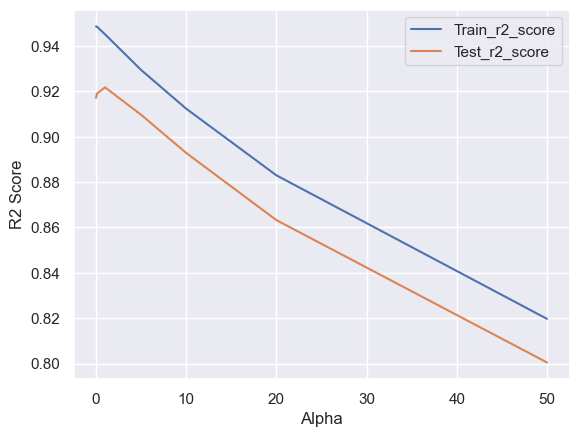

In [69]:
#Plotting mean r2 score for train and test sets for different alpha values.
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['Train_r2_score','Test_r2_score'])
plt.show()

In [70]:
#Best value for alpha
model_cv.best_params_

{'alpha': 1.0}

 - We can see that alpha=1 is the best hyperparameter value

#### Building ridge regression model with alpha=1

In [71]:
ridge_final=Ridge(alpha=1)
ridge_final.fit(x_train_rfe,y_train)
y_pred_train = ridge_final.predict(x_train_rfe)
print("train r2 score",r2_score(y_train,y_pred_train))

y_pred_test = ridge_final.predict(x_test_rfe)
print("test r2 score",r2_score(y_test,y_pred_test))

train r2 score 0.9437890140795079
test r2 score 0.8836827417306091


 - We can clearly see that we get good r2 scores for both train and test set and both the r2 score values are close.

In [72]:
#Derive Model Parameters
model_parameter = list(ridge_final.coef_)
model_parameter.insert(0,ridge_final.intercept_)
cols = x_train_rfe.columns
cols.insert(0,'Constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef['Coef_abs']=ridge_coef['Coef'].abs()
#Printing top 10 features co-efficients
ridge_coef.sort_values(by='Coef_abs',ascending=False)[['Feature','Coef']].head(10)

,Feature,Coef
11,BsmtFullBath,0.255867
23,RemodAge,-0.112662
3,OverallCond,0.098550
9,LowQualFinSF,0.088742
6,BsmtFinSF2,0.078313
2,OverallQual,0.071282
4,MasVnrArea,0.066938
52,Neighborhood_Timber,0.056524
17,WoodDeckSF,0.051715
15,Fireplaces,-0.050979


 - These are 10 most important features of ridge regression.


In [73]:
# Checking for features with 0 coefficients in Ridge regression
(ridge_coef['Coef_abs']==0.).sum()

4

 - There are only 4 features with 0 coefficients in Ridge Regression.
 - Ridge regression model uses 150-4=146 features. 
 - These features explains 88.3 % of variance in the test data

#### Lasso regression

In [74]:
# Lasso
params={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1.0,5,10]}
folds=5
lasso=Lasso()
model_cv=GridSearchCV(estimator=lasso,param_grid=params,cv=folds,scoring='r2',verbose=1,return_train_score=True)
model_cv.fit(x_train_rfe,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 5,
                                   10]},
             return_train_score=True, scoring='r2', verbose=1)

In [75]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009528,0.007781,0.006291,0.007705,0.00001,{'alpha': 1e-05},0.913450,0.940193,0.906494,0.894505,0.939174,0.918763,0.018128,2,0.948198,0.943633,0.953584,0.951593,0.943984,0.948198,0.003978
1,0.006231,0.007631,0.003125,0.006249,0.0001,{'alpha': 0.0001},0.918444,0.941743,0.900061,0.895400,0.945315,0.920192,0.020584,1,0.940365,0.935284,0.945509,0.943956,0.935459,0.940114,0.004217
2,0.009387,0.007664,0.000000,0.000000,0.001,{'alpha': 0.001},0.861850,0.912228,0.840677,0.838803,0.893047,0.869321,0.029023,3,0.885540,0.881664,0.890711,0.892139,0.873687,0.884748,0.006673
3,0.000000,0.000000,0.007286,0.009073,0.01,{'alpha': 0.01},0.524506,0.536823,0.447788,0.410110,0.450850,0.474015,0.048585,4,0.479886,0.463410,0.484363,0.507158,0.488224,0.484608,0.014095
4,0.001385,0.002771,0.004972,0.003329,0.1,{'alpha': 0.1},-0.000008,-0.001806,-0.002904,-0.000481,-0.001413,-0.001322,0.001018,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.003194,0.006387,0.003202,0.006403,1.0,{'alpha': 1.0},-0.000008,-0.001806,-0.002904,-0.000481,-0.001413,-0.001322,0.001018,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.003135,0.006269,0.003125,0.006249,5,{'alpha': 5},-0.000008,-0.001806,-0.002904,-0.000481,-0.001413,-0.001322,0.001018,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.006319,0.007741,10,{'alpha': 10},-0.000008,-0.001806,-0.002904,-0.000481,-0.001413,-0.001322,0.001018,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [76]:
cv_results['param_alpha']=cv_results['param_alpha'].astype('float')

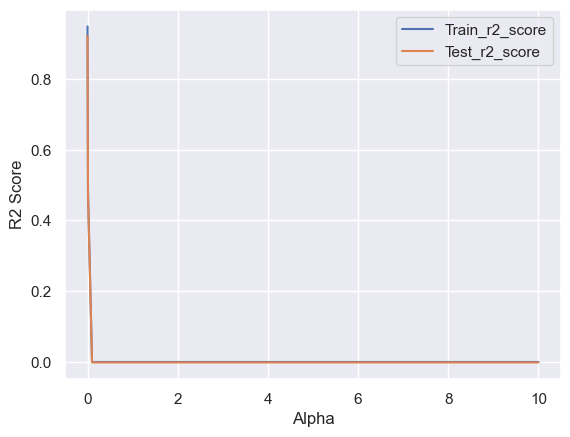

In [77]:
#Plotting mean r2 score for train and test sets for different alpha values.

plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['Train_r2_score','Test_r2_score'])
plt.show()

In [78]:
model_cv.best_params_

{'alpha': 0.0001}

 - We can see that alpha=0.0001 is the best hyperparameter value


In [79]:
lasso_final=Lasso(alpha=0.0001)
lasso_final.fit(x_train_rfe,y_train)
y_pred_train = lasso_final.predict(x_train_rfe)
print("r2 score for train",r2_score(y_pred_train,y_train))

y_pred_test = lasso_final.predict(x_test_rfe)
print("r2 score for test",r2_score(y_pred_test,y_test))

r2 score for train 0.9319067291877406
r2 score for test 0.8707955785971517


 - We can clearly see that we get good r2 scores for both train and test set and both the r2 score values atre close. 
 - The r2 scores are very close to that of ridge regression.

In [80]:
#Derive Model Parameters
model_parameter = list(lasso_final.coef_)
model_parameter.insert(0,lasso_final.intercept_)
cols = x_train_rfe.columns
cols.insert(0,'Constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feature','Coef']
#print(lasso_coef)
lasso_coef['Coef_abs']=lasso_coef['Coef'].abs()
#print(lasso_coef)
#Printing top 10 features co-efficients
lasso_coef.sort_values(by='Coef_abs',ascending=False)[['Feature','Coef']].head(10)

,Feature,Coef
11,BsmtFullBath,0.294339
9,LowQualFinSF,0.121910
23,RemodAge,-0.119277
3,OverallCond,0.108002
4,MasVnrArea,0.073941
2,OverallQual,0.061053
52,Neighborhood_Timber,0.058743
6,BsmtFinSF2,0.057612
15,Fireplaces,-0.052116
93,ExterCond_Fa,-0.048611


 - These are the top 10 most important features for lasso regression.


In [81]:
# Checking for features with 0 coefficients in lasso regression
(lasso_coef['Coef_abs']==0.).sum()

48

 - There are 48 features with 0 coefficients in lasso regression. 
 - Lasso regression uses 150-48=102 features.
 - These features explains 87.1 % of variance in the test data

## Subjective questions demonstration

#### Ques1. Doubling the alpha for both ridge and lasso

In [82]:
#### Ridge regression alpha=2
ridge_2=Ridge(alpha=2)
ridge_2.fit(x_train_rfe,y_train)
y_pred_train = ridge_2.predict(x_train_rfe)
print("train r2 score",r2_score(y_train,y_pred_train))

y_pred_test = ridge_2.predict(x_test_rfe)
print("test r2 score",r2_score(y_test,y_pred_test))

train r2 score 0.9405198938080329
test r2 score 0.8814188939636445


In [83]:
#Derive Model Parameters
model_parameter = list(ridge_2.coef_)
model_parameter.insert(0,ridge_2.intercept_)
cols = x_train_rfe.columns
cols.insert(0,'Constant')
ridge_coef2 = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef2.columns = ['Feature','Coef']
#print(lasso_coef)
ridge_coef2['Coef_abs']=ridge_coef2['Coef'].abs()
#print(lasso_coef)
#Printing top 10 features co-efficients
ridge_coef2.sort_values(by='Coef_abs',ascending=False)[['Feature','Coef']].head(10)

,Feature,Coef
11,BsmtFullBath,0.226620
3,OverallCond,0.102029
23,RemodAge,-0.092131
9,LowQualFinSF,0.084045
6,BsmtFinSF2,0.075334
2,OverallQual,0.067557
4,MasVnrArea,0.060806
17,WoodDeckSF,0.054982
52,Neighborhood_Timber,0.053429
93,ExterCond_Fa,-0.048807


 - Top 10 most important features depending on their absolute value of coefficients.

In [84]:
# Checking for features with 0 coefficients in lasso regression
(ridge_coef2['Coef_abs']==0.).sum()

4

In [85]:
#### Lasso regression with alpha=0.0002

In [86]:
lasso_2=Lasso(alpha=0.0002)
lasso_2.fit(x_train_rfe,y_train)
y_pred_train = lasso_2.predict(x_train_rfe)
print("r2 score for train",r2_score(y_pred_train,y_train))

y_pred_test = lasso_2.predict(x_test_rfe)
print("r2 score for test",r2_score(y_pred_test,y_test))

r2 score for train 0.9214227100361603
r2 score for test 0.8663874635588943


In [87]:
#Derive Model Parameters
model_parameter = list(lasso_2.coef_)
model_parameter.insert(0,lasso_2.intercept_)
cols = x_train_rfe.columns
cols.insert(0,'Constant')
lasso_coef2 = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef2.columns = ['Feature','Coef']
#print(lasso_coef)
lasso_coef2['Coef_abs']=lasso_coef2['Coef'].abs()
#print(lasso_coef)
#Printing top 10 features co-efficients
lasso_coef2.sort_values(by='Coef_abs',ascending=False)[['Feature','Coef']].head(10)

,Feature,Coef
11,BsmtFullBath,0.282260
9,LowQualFinSF,0.123929
3,OverallCond,0.123796
23,RemodAge,-0.098065
4,MasVnrArea,0.072306
6,BsmtFinSF2,0.057638
2,OverallQual,0.054232
52,Neighborhood_Timber,0.051036
93,ExterCond_Fa,-0.044414
17,WoodDeckSF,0.043113


In [88]:
# Checking for features with 0 coefficients in lasso regression
(lasso_coef2['Coef_abs']==0.).sum()

81

 - The number of features with 0 coefficients has increased from 48 to 81.

#### Question3. Removinf 5 most important features and then building the model.


In [89]:
first_five_cols=['LowQualFinSF','BsmtFullBath','RemodAge','MasVnrArea','OverallCond']
x_train_rfe2=x_train_rfe.drop(first_five_cols,axis=1)
x_test_rfe2=x_test_rfe.drop(first_five_cols,axis=1)

In [90]:
lasso_3=Lasso(alpha=0.0001)
lasso_3.fit(x_train_rfe2,y_train)
y_pred_train = lasso_3.predict(x_train_rfe2)
print("r2 score for train",r2_score(y_pred_train,y_train))

y_pred_test = lasso_3.predict(x_test_rfe2)
print("r2 score for test",r2_score(y_pred_test,y_test))

r2 score for train 0.9236215353026996
r2 score for test 0.8615778420731947


In [91]:
#Derive Model Parameters
model_parameter = list(lasso_3.coef_)
model_parameter.insert(0,lasso_3.intercept_)
cols = x_train_rfe2.columns
cols.insert(0,'Constant')
lasso_coef3 = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef3.columns = ['Feature','Coef']
#print(lasso_coef)
lasso_coef3['Coef_abs']=lasso_coef3['Coef'].abs()
#print(lasso_coef)
#Printing top 10 features co-efficients
lasso_coef3.sort_values(by='Coef_abs',ascending=False)[['Feature','Coef']].head(10)

,Feature,Coef
8,BsmtHalfBath,0.283718
3,BsmtFinSF1,0.128295
7,GrLivArea,0.114184
19,MSZoning_FV,-0.084048
4,BsmtFinSF2,0.069511
0,LotFrontage,0.058350
2,OverallQual,0.057657
11,Fireplaces,-0.055478
47,Neighborhood_Timber,0.055256
88,ExterCond_Fa,-0.047828
